#### import the things

In [2]:
import pandas as pd
import json
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

idx = pd.IndexSlice

import scipy.stats
import data
raw_data_fol = os.path.join(data.__path__[0], "raw")

In [3]:
from src.data import data_sorting_tools as dst
%load_ext autoreload
%autoreload 2

In [4]:
numeric_df = pd.read_pickle(os.path.join(data.__path__[0], "compiled", "first_6000_numeric.pkl"))

In [4]:
numeric_df.head()

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,user_statuses_count,media_count,media_types
tid,uid,,,,,,,,,
1363937142200762376,1044743429413117955,0,0,0,0,74,False,511,0,none
1363937239315709958,320715610,0,0,0,0,770,False,5420,0,none
1363937250707451906,194303094,0,0,5,15,3935,False,9899,0,none
1363937296089812992,3185064115,0,0,0,0,14743,False,97453,0,none
1363937322262290442,1150224588921606145,0,0,0,0,22,False,23115,0,none


In [7]:
numeric_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4567 entries, (1363937142200762376, 1044743429413117955) to (1363860840206712836, 553839116)
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   quote_count           4567 non-null   Int64  
 1   reply_count           4567 non-null   Int64  
 2   retweet_count         4567 non-null   Int64  
 3   favorite_count        4567 non-null   Int64  
 4   user_followers_count  4567 non-null   Int64  
 5   user_verified         4567 non-null   boolean
 6   user_statuses_count   4567 non-null   Int64  
 7   media_count           4567 non-null   Int64  
 8   media_types           4567 non-null   string 
dtypes: Int64(7), boolean(1), string(1)
memory usage: 748.5 KB


#### make some plots to look at the data

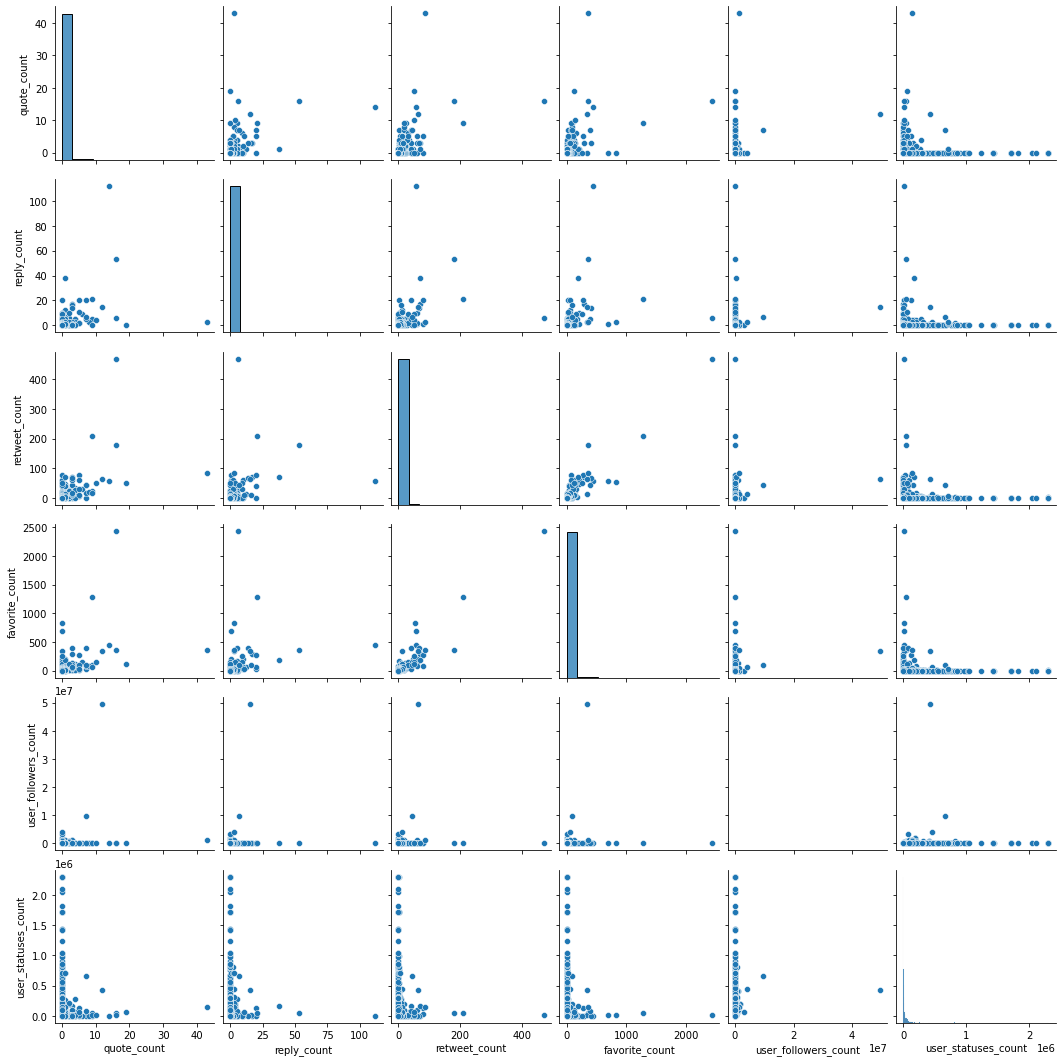

In [89]:
sns.pairplot(numeric_df[['quote_count', 'reply_count', 'retweet_count', 'favorite_count', 
                         'user_followers_count', 'user_statuses_count']])
plt.show()

In [5]:
numeric_df.corr()

,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,user_statuses_count,media_count
quote_count,1.000000,0.349570,0.609355,0.539414,0.238743,0.173510,0.010816,0.003828
reply_count,0.349570,1.000000,0.475218,0.525826,0.123054,0.131908,-0.003032,0.007119
retweet_count,0.609355,0.475218,1.000000,0.890733,0.219247,0.196849,0.010201,0.007721
favorite_count,0.539414,0.525826,0.890733,1.000000,0.210956,0.181651,0.000803,0.002162
user_followers_count,0.238743,0.123054,0.219247,0.210956,1.000000,0.135519,0.054324,-0.001175
user_verified,0.173510,0.131908,0.196849,0.181651,0.135519,1.000000,0.018813,-0.019142
user_statuses_count,0.010816,-0.003032,0.010201,0.000803,0.054324,0.018813,1.000000,-0.002719
media_count,0.003828,0.007119,0.007721,0.002162,-0.001175,-0.019142,-0.002719,1.000000


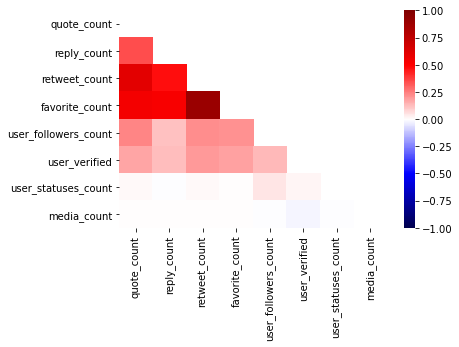

In [6]:
corr = numeric_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           mask=mask)

plt.show()

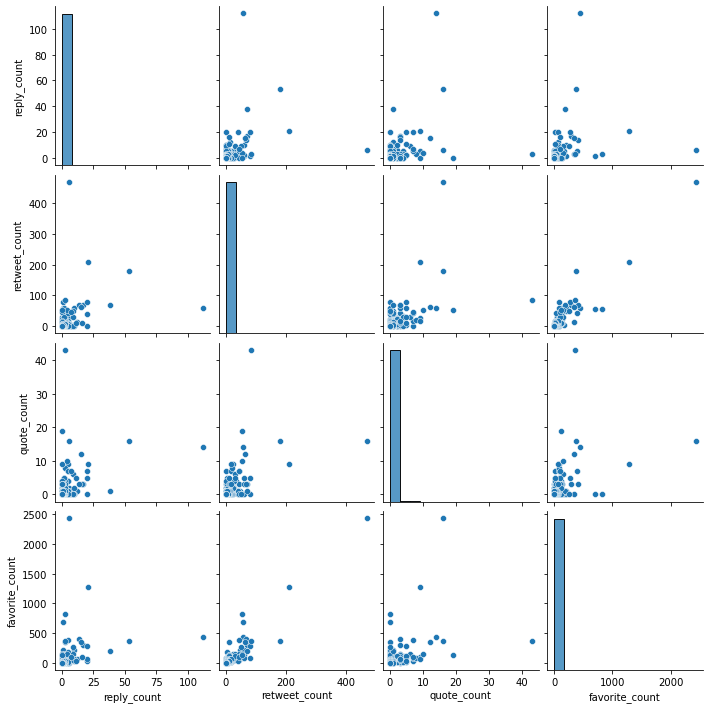

In [173]:
sns.pairplot(numeric_df[['reply_count', 'retweet_count', 'quote_count', 'favorite_count']])
plt.show()

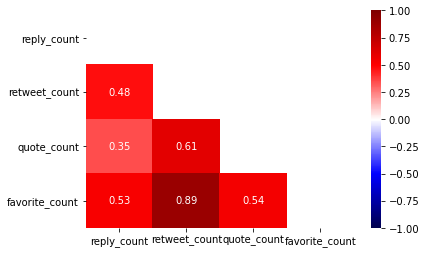

In [8]:
corr = numeric_df[['reply_count', 'retweet_count', 'quote_count', 'favorite_count']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))


sns.heatmap(corr,
           vmin=-1,
           vmax=1,
           cmap='seismic',
           annot=True,
           mask=mask)

plt.show()

In [5]:
top_20_posters = numeric_df.value_counts('uid')[:20]
top_20_posters

uid
138418838              14
1693803998             14
140883428              14
926449271901163521     13
1273807044403965952    13
64767085               11
968627720232972288     10
1170056843391131652    10
1360564874628186112     9
1335779329670848517     9
1091808811428397056     9
121158213               9
1413955044              9
78621972                8
783964422800891904      8
36866990                8
1280173604              8
3027787911              7
773794861535391744      7
15368404                7
dtype: int64

In [10]:
numeric_df.loc[idx[:,top_20_posters.index],:].groupby('uid').sum()[['quote_count', 'reply_count', 'retweet_count', 
                                                                   'favorite_count', 'user_verified']]

,quote_count,reply_count,retweet_count,favorite_count,user_verified
uid,,,,,
15368404,0,4,14,21,7
36866990,0,6,11,29,0
64767085,0,0,3,15,0
78621972,6,9,54,210,8
121158213,0,0,2,8,0
138418838,0,0,6,1,0
140883428,0,1,0,0,0
1280173604,1,6,4,6,0
1413955044,0,0,0,0,0


In [6]:
bottom_20_posters = numeric_df.value_counts('uid')[-20:]
bottom_20_posters

uid
935543111928942597    1
935536344738222081    1
935446829730291717    1
934905742443859968    1
934061335444447232    1
933486024378011648    1
933055483686072321    1
932159095423033344    1
931964153585168384    1
931280690158690304    1
931163186501337088    1
930987806255730688    1
930812764439896064    1
927206780110852097    1
926860756129337345    1
925683142312235008    1
925303491190501376    1
923956572535083008    1
923921421910380544    1
807095                1
dtype: int64

In [12]:
numeric_df.loc[idx[:,bottom_20_posters.index],:].groupby('uid').sum()[['quote_count', 'reply_count', 'retweet_count', 
                                                                   'favorite_count', 'user_verified']]

,quote_count,reply_count,retweet_count,favorite_count,user_verified
uid,,,,,
807095,12,15,63,346,1
923921421910380544,0,0,0,0,0
923956572535083008,0,0,0,1,0
925303491190501376,0,0,0,0,0
925683142312235008,0,0,0,0,0
926860756129337345,0,0,0,0,0
927206780110852097,0,0,0,0,0
930812764439896064,0,0,0,0,0
930987806255730688,0,0,0,0,0


In [13]:
numeric_df.groupby('user_verified').sum()

,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_statuses_count,media_count
user_verified,,,,,,,
False,210,741,1934,8311,15173751,224780885,115
True,157,283,1057,4944,98731519,13094667,2


In [14]:
numeric_df.groupby('user_verified').count()

,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_statuses_count,media_count,media_types
user_verified,,,,,,,,
False,4374,4374,4374,4374,4374,4374,4374,4374
True,193,193,193,193,193,193,193,193


#### reply counts

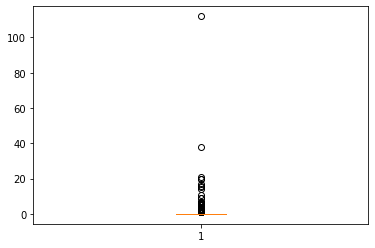

In [15]:
plt.boxplot(numeric_df['reply_count'])
plt.show()

In [16]:
numeric_df.reply_count.sort_values(ascending=False)[:15]

tid                  uid                
1363909584969216000  240420946              112
1363876719791403010  1023533797449580544     38
1363880834898526211  30183485                21
1363892350850904064  1030129847035719681     20
1363918767328231425  1361255214125355008     20
1363935248996847619  180326389               17
1363892936719622144  1340611413669232640     16
1363869939413696513  807095                  15
1363888791061221386  1957125536              14
1363851795538137088  83487731                11
1363873925642469378  301458322                9
1363892949583552522  1034833882040999936      9
1363829842815442948  832187313241329664       7
1363923678023409667  16836187                 7
1363855838184677381  87818409                 7
Name: reply_count, dtype: Int64

In [17]:
numeric_df.loc[idx[1363909584969216000,:],:]

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,user_statuses_count,media_count,media_types
tid,uid,,,,,,,,,
1363909584969216000,240420946,14,112,58,439,29756,True,7074,0,none


In [18]:
np.percentile(numeric_df.reply_count.values, [95,96,97,98,99,99.5])

array([1.0, 1.0, 1.019999999999527, 2.0, 3.0, 5.0], dtype=object)

In [19]:
scipy.stats.percentileofscore(numeric_df.reply_count.values, 10)

99.78103788044669

#### favorite counts

In [20]:
numeric_df.favorite_count.sort_values(ascending=False)[:15]

tid                  uid                
1363880834898526211  30183485               1280
1363909584969216000  240420946               439
1363888791061221386  1957125536              401
1363864096676995072  15721456                389
1363859416844500993  21701757                359
1363869939413696513  807095                  346
1363900873466908675  1289321986989096960     344
1363935248996847619  180326389               297
1363892350850904064  1030129847035719681     278
1363931543786450944  1163435133384515586     206
1363876719791403010  1023533797449580544     190
1363906743617662987  63849197                176
1363892949583552522  1034833882040999936     154
1363857829979967491  1273807044403965952     146
1363848441596583936  368183460               139
Name: favorite_count, dtype: Int64

In [24]:
numeric_df.loc[idx[1363880834898526211,:],:]

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,user_statuses_count,media_count,media_types
tid,uid,,,,,,,,,
1363880834898526211,30183485,9,21,209,1280,53201,True,52596,0,none


In [7]:
fav_no_outliers = numeric_df[(numeric_df.favorite_count < 500)&(numeric_df.favorite_count > 0)].favorite_count

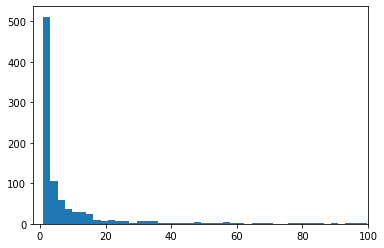

In [26]:
plt.hist(fav_no_outliers, bins=200)
plt.xlim(-2,100)
plt.show()

In [27]:
np.percentile(numeric_df.favorite_count.values, [95,96,97,98,99,99.5])

array([8.0, 11.0, 16.0, 26.0, 56.340000000000146, 95.34000000000015],
      dtype=object)

In [28]:
scipy.stats.percentileofscore(numeric_df.favorite_count.values, 1)

82.97569520472958

In [29]:
scipy.stats.percentileofscore(numeric_df.favorite_count.values, 20)

97.50383183709218

#### retweet counts

In [30]:
numeric_df.retweet_count.sort_values(ascending=False)[:15]

tid                  uid                
1363880834898526211  30183485               209
1363859416844500993  21701757                85
1363892350850904064  1030129847035719681     79
1363891147446358018  608259051               79
1363935248996847619  180326389               69
1363876719791403010  1023533797449580544     69
1363888791061221386  1957125536              68
1363869939413696513  807095                  63
1363902676573036546  15808647                59
1363909584969216000  240420946               58
1363857829979967491  1273807044403965952     52
1363855299015237634  266143766               52
1363931543786450944  1163435133384515586     48
1363855838184677381  87818409                45
1363864096676995072  15721456                42
Name: retweet_count, dtype: Int64

In [32]:
numeric_df.loc[idx[1363880834898526211,:],:]

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,user_statuses_count,media_count,media_types
tid,uid,,,,,,,,,
1363880834898526211,30183485,9,21,209,1280,53201,True,52596,0,none


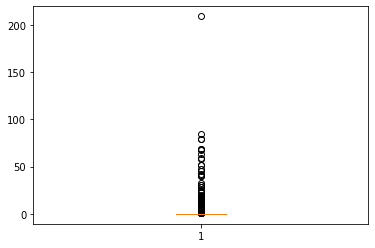

In [33]:

plt.boxplot(numeric_df['retweet_count'])
plt.show()

In [34]:
scipy.stats.percentileofscore(numeric_df.retweet_count.values, 20)

99.40880227720605

In [35]:
np.percentile(numeric_df.retweet_count.values, [95,96,97,98,99,99.5])

array([2.0, 3.0, 4.0, 7.0, 13.0, 25.51000000000022], dtype=object)

#### quote retweet counts

In [36]:
numeric_df.quote_count.sort_values(ascending=False)[:15]

tid                  uid                
1363859416844500993  21701757               43
1363855299015237634  266143766              19
1363909584969216000  240420946              14
1363869939413696513  807095                 12
1363857829979967491  1273807044403965952    10
1363880834898526211  30183485                9
1363880239621959680  148477475               9
1363900936851255298  1321276434812469249     9
1363880452277166082  1063609340521865217     8
1363864096676995072  15721456                7
1363855838184677381  87818409                7
1363893898381262849  1321276434812469249     7
1363892949583552522  1034833882040999936     6
1363867882342522882  78621972                5
1363909052099563520  101790067               5
Name: quote_count, dtype: Int64

In [37]:
numeric_df.loc[idx[1363859416844500993,:],:]

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,user_statuses_count,media_count,media_types
tid,uid,,,,,,,,,
1363859416844500993,21701757,43,3,85,359,1338501,True,139903,0,none


In [8]:
verified = numeric_df[numeric_df.user_verified==True]
not_verified = numeric_df[numeric_df.user_verified==False]

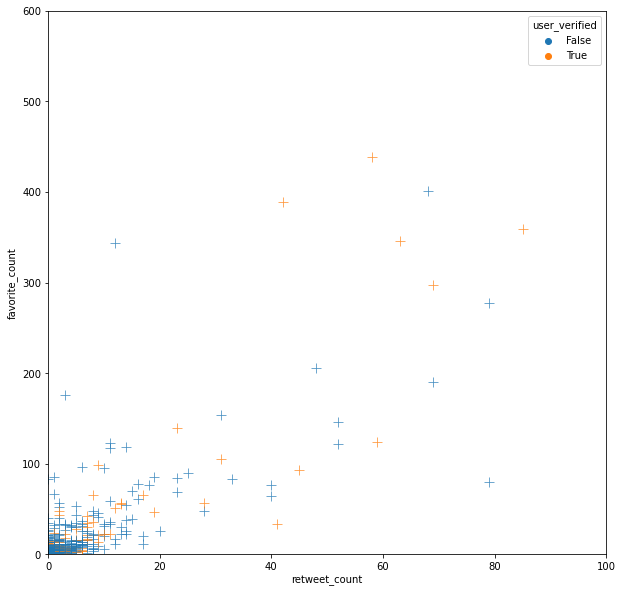

In [92]:
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(data=numeric_df, x='retweet_count', y='favorite_count', hue='user_verified',
                alpha=.8, marker='+', s=100
           )

ax.set_xlim(0,100)
ax.set_ylim(0,600)
plt.show()

In [17]:
verified[verified['favorite_count']>0].favorite_count

,,quote_count,reply_count,retweet_count,favorite_count,user_followers_count,user_verified,user_statuses_count,media_count,media_types
tid,uid,,,,,,,,,
1363938241762578434,2483954344,0,0,6,7,217366,True,170891,0,none
1363939051137622017,25105436,0,0,1,2,26258,True,69077,0,none
1363939589006753793,182675886,0,1,0,3,11113,True,43968,0,none
1363941650351853568,91316071,0,0,6,4,1815688,True,190894,0,none
1363941999901106183,182675886,0,1,0,3,11113,True,43968,0,none
...,...,...,...,...,...,...,...,...,...,...
1363855838184677381,87818409,7,7,45,93,9577604,True,658804,0,none
1363856339554869254,25772065,0,1,0,13,46901,True,838,0,none
1363857820530184200,24559364,0,0,8,36,25542,True,9680,0,none


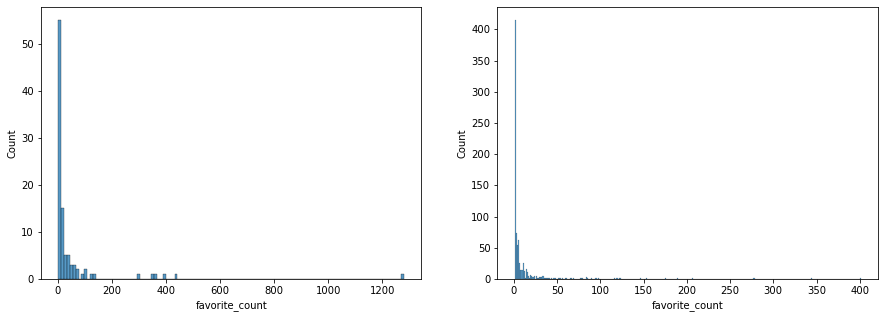

In [18]:
fig, axs = plt.subplots(ncols=2, figsize=(15,5))
sns.histplot(verified[verified['favorite_count']>0].favorite_count, ax=axs[0])
sns.histplot(not_verified[not_verified['favorite_count']>0].favorite_count, ax=axs[1])

plt.show()